In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

In [2]:
df = pd.read_csv("sales_data_features2.csv", encoding='latin1' )

In [3]:


# Split data into features (X) and target (y)
features = [
    "priceeach",
    "msrp",
    "quantityordered",
    "diferencia_ventas",
    "ratio_discount_priceeach",
    "periodo_id"
]

X = df[features]
y = df["validacion_ventas_total"]

# Train / Test split (regresión → sin stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)



In [4]:
#escalar 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:


# Entrenar el modelo de Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)



,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [6]:
#regresión lineal

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:


# Evaluar el modelo Random Forest
print("Random Forest Regressor Evaluation:")
pred = rf_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2:", r2_score(y_test, pred))


Random Forest Regressor Evaluation:
MAE: 0.014729622373950547
RMSE: 0.032518056141814154
R2: 0.9990083809603825


In [8]:
# Evaluar el modelo de regresión lineal
print("\nLinear Regression Evaluation:")
pred_lr = lr_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("R2:", r2_score(y_test, pred_lr))



Linear Regression Evaluation:
MAE: 0.12309478617652643
RMSE: 0.17253256316503404
R2: 0.9720849858448556


In [13]:
#verificar overfitting
train_pred = rf_model.predict(X_train)
print("Random Forest Regressor Training Set Evaluation:")
print("MAE:", mean_absolute_error(y_train, train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("R2:", r2_score(y_train, train_pred))


Random Forest Regressor Training Set Evaluation:
MAE: 0.005947810299842693
RMSE: 0.02007225871594485
R2: 0.9995902371469466


In [10]:
# optimización de hiperparámetros con GridSearchCV (opcional)
para_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=para_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}



itting 3 folds for each of 36 candidates, totalling 108 fits

Se usó validación cruzada con 3 folds (particiones del dataset).

Había 36 combinaciones de hiperparámetros posibles (los "candidates").

Cada combinación se probó en los 3 folds → 
36×3=108 entrenamientos en total.

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

El modelo que se estaba optimizando ( RandomForestRegressor) encontró que la mejor configuración fue:

max_depth = None: el árbol no tiene límite de profundidad, puede crecer hasta que se cumplan otras condiciones de parada.

min_samples_split = 2: un nodo se divide si tiene al menos 2 muestras (es el valor mínimo posible, lo que permite árboles muy detallados).

n_estimators = 300: el bosque tendrá 300 árboles, lo que suele mejorar la estabilidad y precisión del modelo, aunque aumenta el tiempo de entrenamiento.

El proceso evaluó muchas combinaciones y determinó que esta es la que mejor desempeño tuvo en tus datos.

En términos simples: el modelo funciona mejor con árboles muy profundos, divisiones mínimas, y un bosque relativamente grande (300 árboles).

Esto puede dar alta precisión, pero también riesgo de sobreajuste si los datos no son suficientemente grandes o variados.

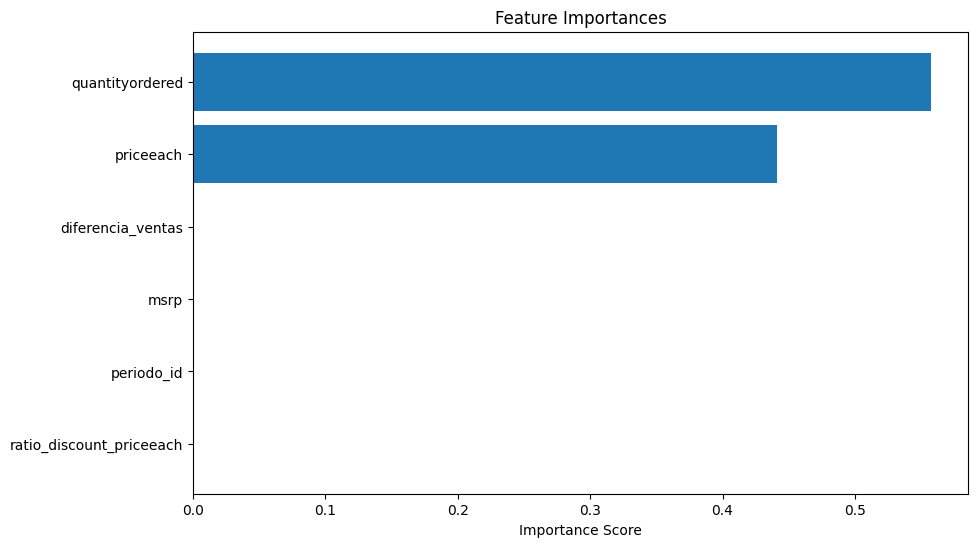

In [11]:
#importancia de las características

importances = rf_model.feature_importances_
feature_names = features
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance Score")
plt.show()

In [12]:
# Guardar los modelos entrenados
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(lr_model, "linear_regression_model.pkl")
print("Modelos guardados correctamente.")

Modelos guardados correctamente.
